# 8. 차원 축소(Dimensionality Reduction)

## 차원 축소를 하는 이유

■ 훈련 샘플 각각이 너무 많은 특성을 가지고 있어서 훈련을 느리게 만들고 어렵게 만듬(이것을 차원의 저주라고 한다.)
따라서 특성 수를 줄여서 훈련을 빠르게 하기 위함.
예를 들면 MNIST 이미지에서 경계에 있는 픽셀은 제거해도 아무런 많은 정보를 잃지 않음

■ 데이터를 시각화 가능하게 만듬. 

### caution

속도가 빨라지는 대신 시스템의 성능이 조금 나빠질 수 있습니다. 또한 파이프라인이 복잡하게 되어서 유지 관리가 어려워 집니다.

## 목차
 
차원의 저주 

차원 축소를 위한 접근 방법

PCA

커널 PCA

LLE

다른 차원 축소 기법


## 8.1 차원의 저주

■ 고차원 공간에서는 많은 것이 저차원과 다르게 작동한다.

-2차원에서 단위 면적 안에 있는 점을 무작위로 선택하면 경계선에서 0.001 이내에 위치할 가능성은 0.4%. 하지만 10000차원의 단위 면적을 가진 초입방체에서는 이 가능성이 99.999%보다 높다. 모든 점들이 경계와 가까이 있다는 뜻

-3차원 큐브에서 임의의 두 점을 선택하면 평균거리는 대략 0.66. 하지만 1,000,000차원의 초입방체에서 두 점을 무작위로 선택하면 거리는 428.25이다. 

-모든 샘플이 서로 멀리 떨어져 있으므로 예측을 하더라도 불안정하다. 이것을 차원의 저주라고 한다.
■ 이론적인 해결방법은 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것입니다.

하지만 특성이 100개만 가지고 있더라도 샘플을 평균 0.1 이내에 위치시키려면 관측 가능한 우주에 있는 원자 수 모두를 합친 것 보다 더 많은 훈련 샘플을 모아야 함.

## 8.2 차원 축소를 위한 접근 방법

차원을 감소시키는 데는 두 가지 주요한 접근법인 투영과 매니폴드 학습이 있다.


### 8.2.1 투영

■ 모든 훈련 샘플들은 사실 고차원 공간에 균일하게 퍼져있는게 아닌 저차원의 부분공간에 놓여있습니다.
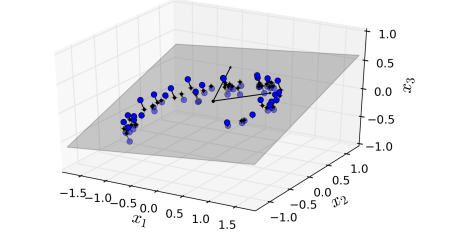
위 그림을 보면 모든 훈련 샘플이 거의 평면 형태로 놓여 있습니다. 이것이 3차원 공간에 있는 저차원 즉 2차원 부분 공간입니다.

이 3차원 훈련 샘플들을 이 부분공간에 수직으로 투영하여 2차원 데이터셋을 얻는 것이 투영입니다.

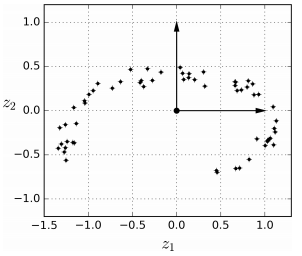

하지만 투영이 최선의 방법은 아니다

### 8.2.2 매니폴드 학습

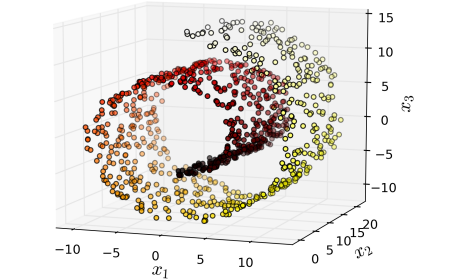
이렇게 공간에서 휘어있는 데이터셋을 스위스롤 데이터셋이라 부른다.

밑의 왼쪽 그림은 그냥 투영시킨 것이고 오른쪽 그림은 스위싀 롤을 펼친 것이다.

평면에 투영시키면 실제 데이터셋을 잘 보존을 못하지만 스위스 롤을 펼치면 뭉게지지 않고 데이터 셋을 얻을 수 있다.

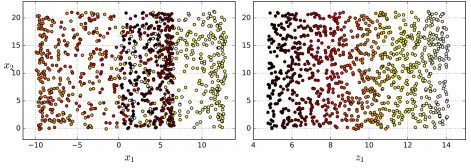

■ 이런 스위스롤을 2D 매니폴드라 한다. 
일반적으로 d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 잇는 n차원 공간의 일부이다.(d<n)

■ 이런 매니폴드를 모델링하는 식으로 차원을 축소하는 알고리즘을 매니폴드 학습 이라고 합니다.
MNIST를 예로 들어 보자. 숫자 이미지들은 경계가 흰색이거나 선으로 연결되어 있는 등 어느 정도의 규칙이 있다. 이는 실제 모든 공간에 균일하게 퍼져 있는 것이 아닌 몇 가지 특성에 모여 있다는 뜻이고 이는 저차원 매니폴드로 압축할 수 있도록 도와줍니다.

■ 하지만 언제나 매니폴드 학습을 한 것이 낫거나 좋은 솔루션이 되는 것은 아니다.
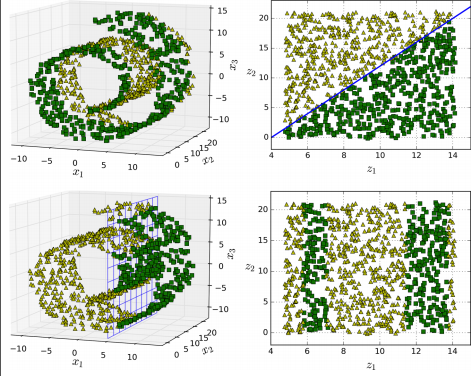

위 그림을 보면 첫 번째 행의 그림은 매니폴드 학습을 하면 쉽게 선형 분류가 가능 하지만 두 번째 행의 그림은 매니폴드를 하기 전이 더 분류하기 쉽다.

■ 따라서 결론적으로 차원을 감소시키면 훈련속도는 빨라지지만 성능이 더 나아지는 것은 데이터셋에 달렸습니다.

## 8.3 PCA (Principal Component Analysis)
데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시키는 차원축소 알고리즘



### 8.3.1 분산 보존
어떤 초평면을 선택해야 할까? 밑의 그림을 보자

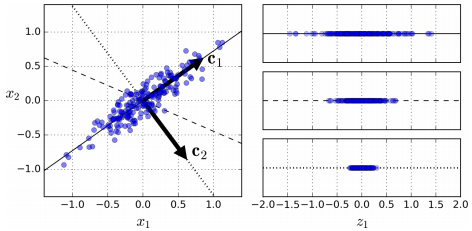
2차원에서 1차원 직선으로 투영을 시키고자 할 때는 분산이 잘 보존된 직선에 투영시키자.

위의 그림에서는 첫번 째 실선이 분산을 잘 보존 시킨다.

다르게 말하면 원본 데이터셋과 투영된 데이터셋 사이의 평균 제곱거리를 최소화하는 축으로 투영을 시키는 것이 좋다.



### 8.3.2 주성분(principal Component)

■차원이 더 높을 때 나머지 축은 어떻게 찾을까?

일단 분산이 최대인 축을 찾고 난 후 다음 축은 첫번째 축에 직교하면서 분산이 최대한 보존하는 축을 찾습니다. 나머지 축도 이런 과정을 통해 찾습니다.  i번째 축을 정의하는 단위 벡터를 i 번째 주성분(pc)라고 부릅니다.

■ 실제로 어떻게 찾을까?

특잇값 분해(svd)를 사용해서 구한다. 

#### 특이값 분해(sigular value decomposition)

A = U ·$\Sigma$·V<sup>t</sup>
    
A는 임의의 m x n 행렬

U 는 AA<sup>t</sup> 의 eigenvalue에 따른 eigenvector를 normalize한 벡터를 열벡터로 가지는 m x m orthgonal matrix

V 는 A<sup>t</sup>A 의 eigenvalue에 따른 eigenvector를 normalize한 벡터를 열벡터로 가지는 n x n orthgonal matrix

$\Sigma$는 AA<sup>t</sup> 혹은 A<sup>t</sup>A의 eigenvalue의 제곱근을 diagonal entry에 갖고 있는 m x n matrix
    


##### v가 주성분을 의미하는 이유

(A<sup>t</sup>A)<sup>t</sup> = A<sup>t</sup>A이므로 A<sup>t</sup>A는 diagonalizable하다.

A<sup>t</sup>A = UDU<sup>t</sup> 여기서 U는 A<sup>t</sup>A의 eigenvector를 열벡터로 가지는 행렬이고 D는 eigenvalue를 diagonal entry로 가지는 행렬 여기서 U는 orthgonal matrix.
    
똑같이 AA<sup>t</sup> = VDV<sup>t</sup>이다.  똑같이 V는 AA<sup>t</sup>의 eigenvecor를 열벡터로 가지는 행렬이고 D는 eigenvalue를 diagonal entry로 가지는 행렬 여기서 V는 orthgonal 

matrix
    
여기서 D는 같은 행렬이다.

v<sub>i</sub>를 U의 i번째 열벡터, $\lambda$를 v<sub>i</sub>에 해당하는 eigenvalue 라고 하면 A<sup>t</sup>Av<sub>i</sub> = $\lambda$v<sub>i</sub>가 성립한다. 
    
양쪽의 앞에 A를 곱하면 (AA<sup>t</sup>)(Av<sub>i</sub>) = $\lambda$(Av<sub>i</sub>)
    
그러면 Av<sub>i</sub>가 AA<sup>t</sup>의 eigenvector인 것을 알 수 있다. 
    
길이가 1인지도 보자 

||Av<sub>i</sub>||
    
= Av<sub>i</sub>)<sup>t</sup> ·(Av<sub>i</sub>)
    
= (v<sub>i</sub>)<sup>t</sup>·A<sup>t</sup>·A·v<sub>i</sub>
    
= (v<sub>i</sub>)<sup>t</sup>·($\lambda$)<sub>i</sub>·v<sub>i</sub>
    
= ($\lambda$)<sub>i</sub>·(v<sub>i</sub>)<sup>t</sup>·v<sub>i</sub>
     
= ($\lambda$)<sub>i</sub> where $\lambda$<sub>i</sub> is ith eigenvalue of AA<sup>t</sup>
    
길이가 1이 아니므로  $\lambda$<sub>i</sub>의 제곱근으로 Av<sub>i</sub>를 나눈 벡터가 orthonormal eigenvector이다.

U의 i 번째 열벡터를 u<sub>i</sub>라 하면 u<sub>i</sub> = Av<sub>i</sub>/$\lambda$<sub>i<sub>의 제곱근
    
$\lambda$<sub>i</sub>의 제곱근 u<sub>i</sub> = Av<sub>i</sub> 

AV  = U$\Sigma$  여기서 $\Sigma$는 AA<sup>t</sup>의 eigenvalue의 제곱근을 diagonal entry로 갖는 행렬
    
따라서 A  = U$\Sigma$V<sup>t<sup>
    


그래서 주성분 행렬은 V의 열벡터가 주성분이 됩니다.

In [2]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [17]:
## 코드로 주성분을 구하고 두개의 PC를 추출하자

X_centered = X-X.mean(axis=0) ## axis = 0 는 열의 mean을 구하라는 뜻
## 직접 주성분을 구할 때는 꼭 데이티
U,s,Vt = np.linalg.svd(X_centered) 
c1 = Vt.T[:,0] ## 행으로 해도 될텐데?
c2 = Vt.T[:,1]

In [16]:
a = np.array([[1,2,3],[4,5,6]])
a.mean(axis=0)

array([2.5, 3.5, 4.5])

### 8.3.3 d차원으로 투영하기 

■ d차원의 하이퍼플레인의 주성분을 구했으면 투영을 시키자 


X<sub>d-proj</sub> = X·W<sub>d</sub> 

W<sub>d</sub>는 V 행렬의 첫 d번째까지의 열벡터를 가지고 온 것

In [18]:
## 코드로도 구현해보자

W2 = Vt.T[:,:2] # 2개의 주성분을 가져와
X2D = X_centered.dot(w2) # 2차원으로 투영!!

### 8.3.4 사이킷런 사용하기
직접 하지 않고 역시나 사이킷런 사용해서 가능


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
## 사이킷런은 자동으로 데이터를 중앙에 맞춰줌
pca.components_.T[:,0]
## components_라는 객체변수에 주성분이 행벡터로 있음

array([-0.93636116, -0.29854881, -0.18465208])

### 8.3.4 설명된 분산의 비율



In [23]:
pca.explained_variance_ratio_
## 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타냅니다.

array([0.84248607, 0.14631839])

#### 적절한 차원 수 선택하기 

차원 수를 제한 하기 보다는 충분한 분산이 될 때까지 더 해야할 차원 수를 선택하는 것이 좋습니다. 물론 데이터 시각화를 위해 축소하는 경우는 제외입니다.




In [51]:
## 분산 95%를 유지하는 데 필요한 최소한의 차원 수 계산

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) ## 모든 배열의 원소들을 누적으로 다 더한 놈들 반환
d = np.argmax(cumsum>=0.95)+1 ## argmax는 제일 큰 수의 index를 1차원 배열로 봤을 때의 index로 반환
pca = PCA(n_components= d) ## d를 주성분의 숫자로 지정
## 비율을 지정하는 방법도 있음 
pca = PCA(n_components = 0.95) ## 보존하려는 분산의 비율을 0.95로 지정
X_reduced =pca.fit_transform(X)

In [52]:
a = [[1,2,3],[2,4,4]]
np.cumsum(a)

array([ 1,  3,  6,  8, 12, 16], dtype=int32)

 모든 배열의 원소들을 누적으로 다 더한 놈들 반환

In [53]:
np.argmax(a)

4

### 8.3.7 압축을 위한 PCA

PCA를 통해 얻을 수 있는 장점은 훈련 셋의 크기가 줄어든 다는 것입니다.

예를 들어 MNIST 데이터셋의 원래 특성은 784개 이지만 95%의 분산을 유지하여 PCA를 적용시키면 특성은 150개 정도만 가지고 있습니다.

또한 다시 PCA를 반대로 변환하는 알고리즘도 있습니다.

일정량의 정보를 잃어버렸지만 원본 데이터셋과 비슷할 것입니다.

원본데이터와 재구성된 데이터 사이의 평균 제곱 거리를 재구성 오차(reconstruction error)라고 합니다.



In [100]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

mnist = fetch_mldata('MNIST original')

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [79]:
## 다시 차원을 늘려보자

pca = PCA(n_components=154) ## 154개로 줄이고 
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced) ## 다시 돌리자 

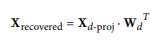

위의 식은 역변환 공식이다

###  8.3.8 점진적 PCA

■ pca의 문제는 전체 훈련세트를 메모리에 올려야한다는 것이다.
하지만 점진적 PCA(Incremental PCA)(IPCA)가 개발 되어서 미니 배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입합니다. 

이런방식은 훈련 세트가 클 때 유용하다



In [99]:
## IPCA를 한번 써보자

from  sklearn.decomposition import IncrementalPCA

n_batches = 100 # 배치를 100개로 잡고
inc_pca = IncrementalPCA(n_components=154) ## 154개의 특성을 가지는 IPCA
for X_batch in np.array_split(X_train, n_batches): ## split 합수는 X_trin을 100개의 배치로 나눠주는 함수
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch) ## fit 함수 대신에 partial_fit 함수 사용

X_reduced = inc_pca.transform(X_train)

....................................................................................................

■ 또 다른 방법은 memmap 파이썬 클래스를 사용해 하드 디스크의 이진 파일에 저장된 매우 큰 배열을 메모리에 들어 있는 것처럼 다루는 것이다.


In [92]:
np.memmap?

In [91]:
filename = 'my_mnist.data'
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train


##del X_mm

##X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

##batch_size = m // n_batches
##inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
##inc_pca.fit(X_mm)

OSError: [Errno 22] Invalid argument: 'my_mnist.data'

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 8.3.9 랜덤 PCA

사이킷 런에서 제공하는 알고리즘으로 첫 d개의 주성분에 대해서 근삿값을 빠르게 찾는다.

d가 n보다 많이 작으면 앞선 알고리즘 보다 빨라짐

In [96]:
## 랜덤 PCA써보자
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42) ## PCA파라미터의 svd_solver를 'radomized로 지정해주면 됨'
X_reduced = rnd_pca.fit_transform(X_train)

## 8.4 커널 PCA(KPCA)

■5장에서 배웠던 커널트릭을 PCA에도 적용해 복잡한 비선형 투영으로 차원 축소를 가능하게 하는 PCA

■ 투영된 후에도 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때 유용




In [101]:
## RBF 커널로 KPCA를 적용
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04) 
X_reduced = rbf_pca.fit_transform(X_train)

MemoryError: 

### 8.4.1 커널 선택과 하이퍼파라미터 튜닝

■ 튜닝 방법에 두가지가 있습니다.

1. 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택 할 수 있다.

2. 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 그리드 탐색을 사용해 선택하는 방식



In [98]:
## 지도학습의 전처리 단계로서 성능을 기준으로 그리드 탐색을 한 예
## 로지스택 회귀를 하기 전에 kpca를 사용한 예 
## 그리드 kpca pipeline에 대해 그리드 탐색을 실시하면 됨

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver='liblinear'))
    ]) ## kpca와 로지스틱 regression을 이은 파이프라인

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }] ## 그리드 서치의 후보군 설정
    
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

print(grid_search.best_params_) ## best_params_ 변수에 저장

MemoryError: 

kPCA는 PCA처럼 역전시키면 데이터 포인트가 원본공간이 아닌 커널트릭을 이요한 특성 공간에 놓이게 된다. 

여기서는 에러를 계산할 수 없는데 대신 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다.

이를 재구성 원상(pre-image)라고 한다.

이 재구성 원상과 원본 샘플의 오차를 최소화하는 방향으로 최상의 하이퍼파라미터와 커널을 찾는다.

재구성 원상을 찾는 방법 중 하나는 투영된 샘플을 훈련 세트로 원본 샘플을 타깃으로 하는 지도학습 회귀모델을 훈련시키는 것이다.

사이킷런에서는 IPCA의 변수 중 fit_inverse_transform을 True로 지정하면 자동으로 수행한다.



In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True) 
## fit_inverse_transform의 default 값은 Fasle이다.
## inverse_transform() 매서드는 가지고 있지 않다.
X_reduced = rbf_pca.fit_transform(X_train)
X_preimage = rbf_pca.inverse_transform(X_reduced)

이 다음 재구성 원상 오차를 계산하여 교차 검증으로 그리드 탐색사용

## 8.5 LLE(Locally Linear Embedding)

투영에 의존하지 않는 매니폴드 학습이자 비선형 차원축소 방법이다. 

#### 작동방식

단계 1 
1. 각 훈련 샘플에 대해서 x<sup>i</sup>에 대해 가장 가까운 k개의 샘플을 찾습니다.
2. x<sup>i</sup>와 	$\sum_{j=1}^m w_{i,j}x^{(j)}$ 사이의 제곱거리가 최소가 되는 $w_{i,j}$를 찾는다
3. $x^j$가 $x^i$가 아닐 경우 $w_{i,j}$  = 0

식으로 표현하면 밑의 식이 된다. 
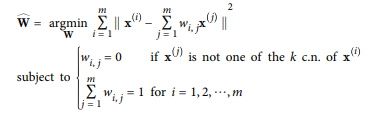

$\hat{W}$는 지역 선형관계를 담고 있음 
두 번째 조건은 훈련 샘플에 대한 가중치를 정규화 한것

4. $z^{i}$를 d차원 공간에서 $x^{i}$의 image라면 $z^{i}$와 $\sum_{j = 1}^m \hat{w_{i,j}}z^{(j)}$ 사이의 거리를 최소화 하는 $z^i$를 찾는다

이것을 식으로 나타내면 다음과 같이 됩니다.
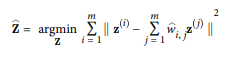



In [ ]:
## 코드로 LLE를 구현해 보자

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42) ## n_neigbors가 위 식의 k가 된다.
X_reduced = lle.fit_transform(X)

## 8.6 다른 차원 축소 기법

다양한 축소 기법을 제공 

■ 다차원 스케일링 - 샘픍나의 거리를 보존하면서 차원을 축소

■ Isomap - 샘플을 가장 가까운 이웃과 연결하여 그래프를 만든 후 지오데식 거리를 유지하면서 차원 축소

■t-SNE(t-Distributed Stochastic Neighbor EMbedding) - 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원 축소 , 시각화에 많이 사용, 특히 고차원 공간에 있는 샘플의 군집을 시각화 할 때 사용

■ 선형 판별 분석(Linear Discrimininat Analysis)(LDA) - 분류 알고리즘 이지만 훈련 과정에서 클래스 사이를 장 구분하는 축을 학습 하고 이 축을 데이터가 투영되는 초평면을 정의하는데 사용가능. 장점은 투영을 통해 클래스를 멀리 떨어지게 유지시키므로 svm 분류 같은 다른 분류알고리즘을 적용하기 전에 차원 축소시키는데 좋음